In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim
import scipy.stats as scs
import pandas as pd

from plot_utils import (superimpose_pdf_of_fit_model, 
                        superimpose_cdf_of_fit_model,
                        one_dim_scatterplot,
                        text_in_blank_plot)


from itertools import product

%matplotlib inline

plt.style.use('ggplot')

# Sampling Theory

In this section we will take another path towards understanding samples taken from an unknown population.  In the morning we fit statistical models to approximate the popuation, this afternoon we will study mathematical properties of the population itself.

## Sampling Distributions of Statistics

We need a way to mathematically model a simple random sample. For example, each of the following can be modeled as taking an i.i.d. random sample from a population:

  - A random survey of humans is an i.i.d sample of all humans of interest to the survey designers.
  - A dataset of all the quotes received for an insurance product is an i.i.d sample of all possible customers of the insurance company.
  - Driving around a city and turning a random direction at each intersection is an i.i.d sample of all possible paths driven through the city (as long as you start in a random place).
  
When we have such a situation, we will adopt a slight change in perspective that will make our mathematics work out more easily:

**We consider each individual data point drawn from our population as its own random variable.**

So, under this model, a i.i.d sample can be thought of as a **sequence of random variables that are independent and identically distributed**

$$ X_1, X_2, X_3, \ldots, X_n $$

When we actually **physically take** the sample, i.e. **collect data**, we get datapoints $x_1, x_2, \ldots, x_n$, each one drawn from the corresponding random variable $X_k$.
  
A **statistic** is a function of a random sample $T(X_1, X_2, ..., X_n)$.  I.e., something we can compute once we have a random sample.

### Examples of Statistics

Here are a couple simple and common statistics.  To illustrate, we've drawn 20 samples from a normal distribution and recorded the value of the statistic.

The **sample mean** is a statistic defined as $\bar{x} =\frac{1}{n} \sum_i X_i$

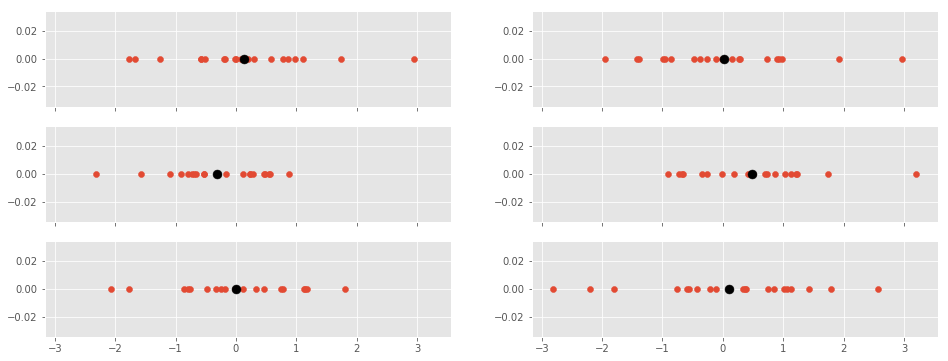

In [2]:
normal = scs.norm(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)

for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    mean = np.mean(samp)
    ax.scatter([mean], 0, c="black", s=80)

The **sample maximum** is defined by $\max (X_1, X_2, \ldots, X_n)$

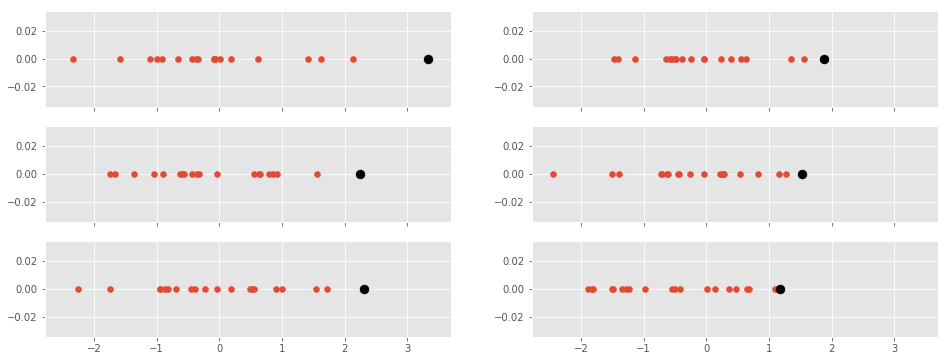

In [3]:
normal = scs.norm(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)

for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    M = np.max(samp)
    ax.scatter([M], 0, c="black", s=80)


**Question:** What is another sample statistic that is commonly encountered?

Each time we draw a new sample, we compute a slightly different value of the statistic.  This makes the **statistic itself a random variable**.  The variation in the statistic comes from the different samples that we may draw from the population.

## The Main Question In Sampling Theory

### How do we **quantify** the amount of variation of a sample statistic?

To quantify the amount of variation of a statistic, we would really like a process like this:

  - Draw some number of independent and identically distributed data from the population $X$, i.e. a sample.
  - Compute the statistic using the sample you drew.
  - Record the value of the statistic just computed in a database.
  - Do it again, and again, and again, until the sun burns out.
  
After this process is complete, we have many examples of our statistic, each computed from a different random sample from our variable.

The distribution of *the statistic* that arises from this process is called the **sampling distribution of the statistic**.

### Example: Sample Means from A Normal Variable

Recall our sample means from the previous example:

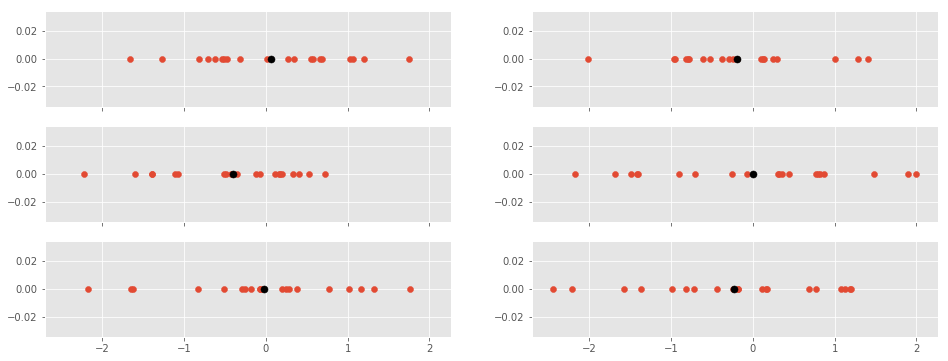

In [4]:
normal = scs.norm(0, 1)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)

means = []
for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    mean = np.mean(samp)
    means.append(mean)
    ax.scatter([mean], 0, c="black", s=50)

The distribution of the *black points* is the **sampling distribution of the mean**.

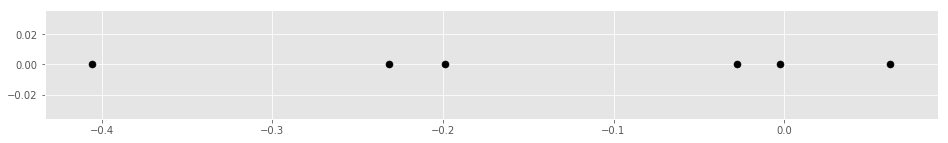

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.scatter(means, np.repeat(0, 6), c='black', s=50);

If we superimpose a sample from the original distribution, it's very clear that the spread of the sampling distribution is much smaller than that of the original.

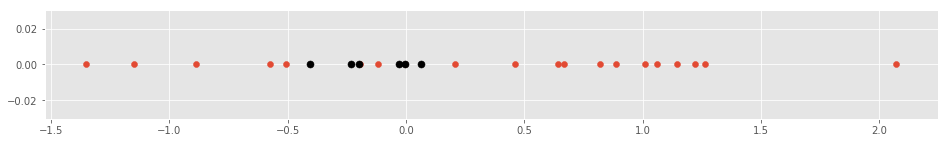

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.scatter(normal.rvs(20), np.repeat(0, 20))
ax.scatter(means, np.repeat(0, 6), c='black', s=50);

Two questions present themselves:

  - What is the average value of the statistic?
  - How much does the statistic vary around its average value?

#### What is the expectation value of the sample mean?
$\text{E}[\bar{x}] = \text{E}\left[\frac{1}{n}\sum\limits_{i=1}^n X_i\right] 
    = \frac{1}{n}\sum\limits_{i=1}^n \text{E}[X_i]
    = \frac{1}{n}\sum\limits_{i=1}^n \mu
    = \frac{1}{n}n \mu
    = \mu$
    
#### What is the variance of the sample mean?

$$ Var(\bar{x}) = Var \left( \frac{X_1 + X_2 + \cdots + X_n}{n} \right) = \frac{1}{n^2} Var (X_1 + X_2 + \cdots + X_n) = \frac{n}{n^2} Var(X) = \frac{1}{n} Var (X) $$

**Note** The variance of a sum is not usually the sum of the variances, we are using the assumption that we have an i.i.d sample here!

### What about a different statistic: the sample variance?

$ s_n^2 = \frac{1}{n}\sum\limits_{i=1}^n (X_i - \bar{x})^2 $

##### Exercise: show that $\text{E}[s_n^2] = \frac{n-1}{n}\sigma^2$
- the sample variance is a _biased estimator_ of the population variance. This is why you often see [Bessel's Correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) to the sample variance:
$ s_{n-1}^2 = \frac{n}{n-1}s_n^2 = \frac{1}{n-1}\sum\limits_{i=1}^n (X_i - \bar{x})^2 $

This corrected version is the unbiased estimator of population variance. $\text{E}[s_{n-1}^2] = \sigma^2$

Sometimes you'll see $s_{n-1}^2$ written simply as $s^2$. Be wary of numpy and pandas: they have different defaults for returning the corrected / uncorrected variance.

In [7]:
dummy = [1,6,4,8,10]

In [8]:
np.var(dummy)

9.7599999999999998

In [9]:
np.var(dummy, ddof=1)

12.199999999999999

In [10]:
pd.Series(dummy).var()

12.2

In [11]:
pd.Series(dummy).var(ddof=0)

9.76

In [12]:
pd.Series.var?

When do you use which? 
 - The uncorrected variance $s_n^2$ of a sample is what you want when you really just want to calculate the average squared deviation from the sample mean
 - The corrected variance $s^2$ is used any time you are trying to use the sample variance to estimate the population variance

If you're wondering about $Var(s^2)$, see [here](https://stats.stackexchange.com/questions/29905/reference-for-mathrmvars2-sigma4-left-frac2n-1-frac-kappan)

## The Bootstrap

The analysis above is nice, sure, but it has a big drawback:  **it pretty much only works for the sample mean and sample variance**. It would be nice to have a general procedure that would let us estimate the variance of **any sample statisic**, regardless of how incalculable its expecation value is.

### Bootstrap Samples

We generally have one fixed dataset, which we view as a single sample from the population.  **The population is the object that interests us, and the sample is the lens through which we get to view it.**

The idea behind the bootstrap is that the **empirical distribution** of the sample should be our **best approximation** to the distribution of the population the sample is drawn from.  We can illustrate this by comparing the empirical distribution functions of samples to the actual population distribution functions:

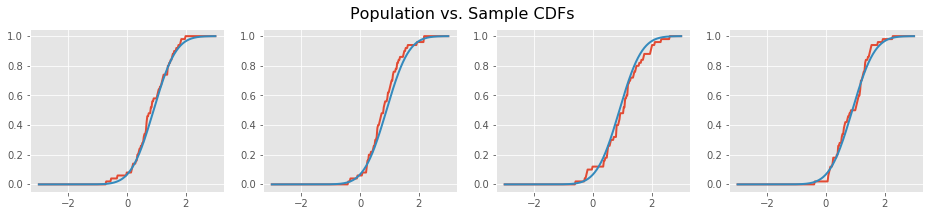

In [13]:
population = scs.norm(0.9, 0.6)

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for ax in axs.flatten():
    sample = population.rvs(50)
    superimpose_cdf_of_fit_model(sample, population, ax)
fig.suptitle("Population vs. Sample CDFs", fontsize=16);

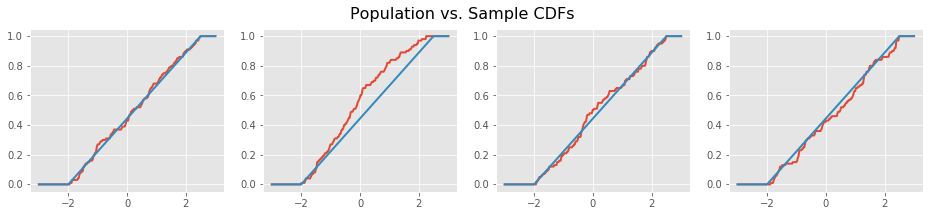

In [14]:
a, b= (-2, 2.5)
population = scs.uniform(a, b-a)

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for ax in axs.flatten():
    sample = population.rvs(100)
    superimpose_cdf_of_fit_model(sample, population, ax)
fig.suptitle("Population vs. Sample CDFs", fontsize=16);

This means that  **since we cannot repeatedly sample from the population, our next best bet is to sample from the sample itself**.

#### Bootstrap: The Big Idea

We want to do this:

> Estimate the variance of a sample statistic by repeatedly sampling from the population, computing the sample means of these samples, and then computing the variance of the multiple sample means.

But we **can't**, because we can **only sample from the population one time**.

Instead, we repeatedly sample from our **best approximation to the population distribution**, which is given by the **empirical density function of the sample**.

That is, instead we do

> Estimate the variance of a sample statistic by repeatedly sampling from *a distribution approximating the population distribution*, computing the sample statitics of these samples, and then computing the variance of the multiple sample statistics.

### Definition

A **bootstrap sample** from a dataset is a sample taken with replacement from that dataset whose size is the size of the dataset itself.

##### Class exercise: let's write a function that generates a bootstrap sample given a real sample

In [15]:
dummy_data = scs.distributions.norm(5,9).rvs(10)

In [16]:
for dum in dummy_data:
    print(dum)

7.03062950627
0.111113714119
11.4490987513
6.63716827613
11.9004026208
7.19820600673
9.7243891588
4.56849430813
-6.29302053663
4.93137730762


In [17]:
def our_bootstrap(data):
    data_array = np.zeros(data.shape)
    for i in range(len(data)):
        rand_idx = np.random.randint(0, len(data))
        data_array[i]= data[rand_idx]
    return data_array

In [18]:
our_bootstrap(dummy_data)

array([ 11.90040262,   0.11111371,   7.03062951,   4.56849431,
        -6.29302054,   7.03062951,  11.44909875,   0.11111371,
        11.44909875,   7.03062951])

In [19]:
dummy_data > 3

array([ True, False,  True,  True,  True,  True,  True,  True, False,  True], dtype=bool)

In [20]:
dummy_data[dummy_data > 3 ]

array([  7.03062951,  11.44909875,   6.63716828,  11.90040262,
         7.19820601,   9.72438916,   4.56849431,   4.93137731])

In [21]:
dummy_data[[1,1,1,0,3,1]]

array([ 0.11111371,  0.11111371,  0.11111371,  7.03062951,  6.63716828,
        0.11111371])

In [22]:
dummy_data.astype(int)

array([ 7,  0, 11,  6, 11,  7,  9,  4, -6,  4])

In [23]:
dummy_data[np.random.randint(0, len(dummy_data), size=len(dummy_data))]

array([ 11.44909875,   0.11111371,   4.93137731,  11.44909875,
         7.03062951,   9.72438916,  -6.29302054,  -6.29302054,
         7.03062951,   9.72438916])

In [24]:
data = scs.distributions.norm(0.1,0.7).rvs(size=50)
print(data)

[ 0.03486419 -0.39684847  1.8669141  -0.40367792  0.57194924  0.39672362
 -0.64147315 -0.05534084  0.60361737 -0.43328663  1.36043106  0.25446846
  0.33508056  0.55776377  0.1996528  -0.05756514  0.46378482  0.69186756
  0.05531075  0.8113129  -0.50515167  0.74009159 -0.20957373  0.28055386
  0.55229482  0.36447791  0.14821498  0.33612036 -0.58112518 -0.59207443
  1.29106157 -0.23826401 -0.34115056  1.07930725  0.30479707  0.54163732
 -0.16957242 -1.02562875  0.14256478 -0.52919883 -0.79117244  1.9303604
  0.92548154 -0.56303495 -0.32525845  1.18130486  0.16058334  0.86730809
  0.41643899 -0.26722107]


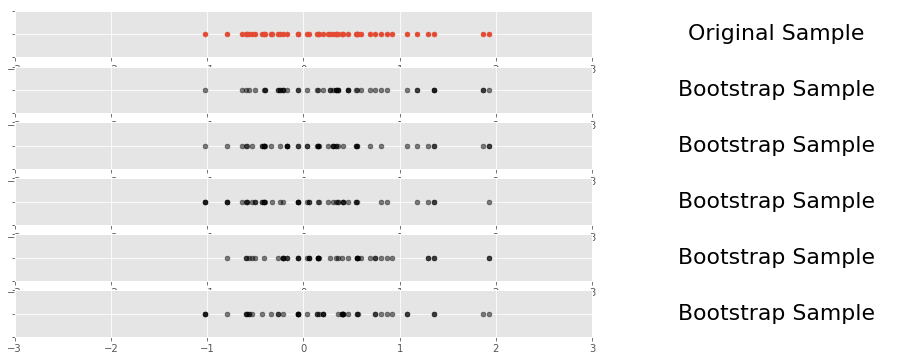

In [25]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap_indices = np.random.randint(low=0, high=len(data), size=len(data))
    bootstrap_sample = data[bootstrap_indices]
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(bootstrap_sample, ax, s=25, c="black", alpha=0.5)
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Bootstrap Sample", ax)

Each bootstrap sample has its **own** sample statistics. Let's say we wanted a bootstrapped estimate of **sampling distribution of the median**

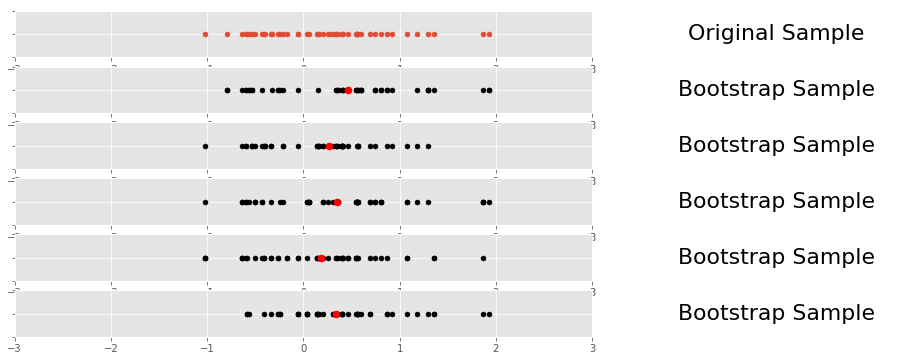

In [26]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap_indices = np.random.randint(low=0, high=len(data), size=len(data))
    bootstrap_sample = data[bootstrap_indices]
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(bootstrap_sample, ax, c="black", s=25)
    sample_median = np.median(bootstrap_sample)
    ax.scatter([sample_median], 0, c="red", s=50)
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Bootstrap Sample", ax)

The sample medians taken from repeated bootstrap samples are then an approximation to the **distribution of the sample medians**

In [27]:
def bootstrap_sample_medians(data, n_bootstrap_samples=10000):
    bootstrap_sample_medians = []
    for i in range(n_bootstrap_samples):
        bootstrap_indices = np.random.randint(low=0, high=len(data), size=len(data))
        bootstrap_sample = data[bootstrap_indices]
        bootstrap_sample_medians.append(np.median(bootstrap_sample))
    return bootstrap_sample_medians

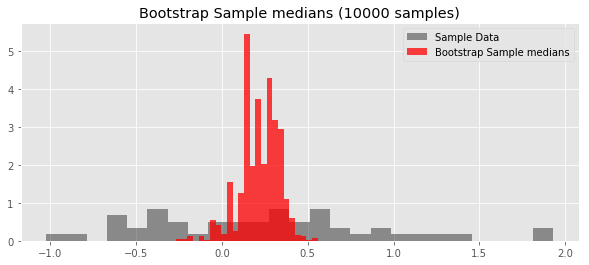

In [28]:
bootstrap_medians = bootstrap_sample_medians(data)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(data, bins=25, normed=True, color="black", alpha=0.4,
            label="Sample Data")
_ = ax.hist(bootstrap_medians, bins=25, normed=True, color="red", alpha=0.75,
            label="Bootstrap Sample medians")
ax.legend()
_ = ax.set_title("Bootstrap Sample medians (10000 samples)")

We can now use the bootstrap distribution of the sample median to estimate statistics that would otherwise be unapproachable.

In [29]:
np.median(data)

0.22706063073710508

In [30]:
variance_of_sample = np.var(data)
variance_of_bootstrap_medians = np.var(bootstrap_medians)

print("Variance of Sample: {:2.2f}".format(variance_of_sample))
print("Variance of Sample medians: {:2.2f}".format(variance_of_bootstrap_medians))

Variance of Sample: 0.43
Variance of Sample medians: 0.01


In [31]:
np.percentile(bootstrap_medians, 5)

-1.5047249191584705e-05

In [32]:
np.percentile(bootstrap_medians, 95)

0.36642198861131925

### Bootstrap: The Point

The Bootstrap is a tool to **quantify the variation in a statistical estimate**.  It can be used in almost **any** situation.

The bootstrap is a giant point in favor of the massive amount of computation we all have at our disposal today.  Before the computer age, the practice of statistics was tedious and mathematical.  Now we can estimate things earlier generations would **never have dreamed of** by simply putting to work some carefully engineered slabs of silicon.

**Question:** Are there any statistics where the bootstrap will *not* work to quantify variation?

## The Central Limit Theorem

The bootstrap works for approximating the sampling distribution of *any* statistic.  It's flexibility makes it a fundamental tool in the box of **any** statistician or data scientist.

There is **exactly one** special case where the bootstrap pales in comparison to a mathematical miracle.

### The Distribution of the Sample Means

Let's return to the distribution of a very popular statistic, the **distribution of the sample means**.

Consider a fixed population, and for the moment, suppose we have the power to sample freely, as many data points as we wish

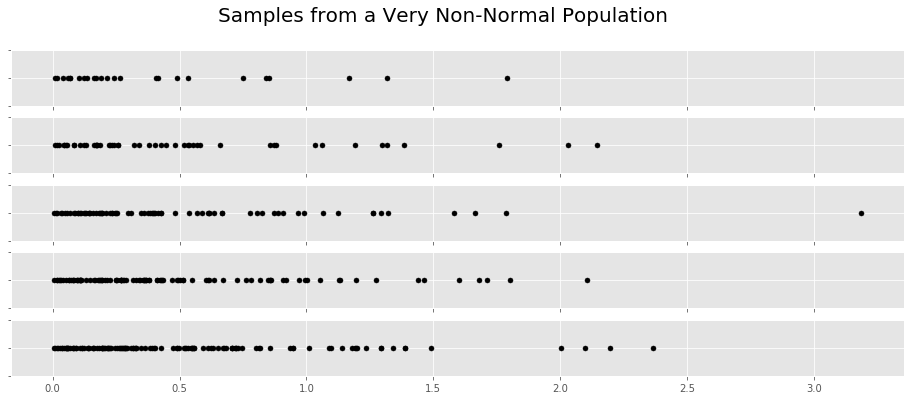

In [33]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

lam = 2
population = scs.expon(scale=1/lam)
sample_sizes = [25, 50, 75, 100, 125]
for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Samples from a Very Non-Normal Population", fontsize=20)

Suppose we fix a sample size, and repeatedly sample from the population with that fixed size

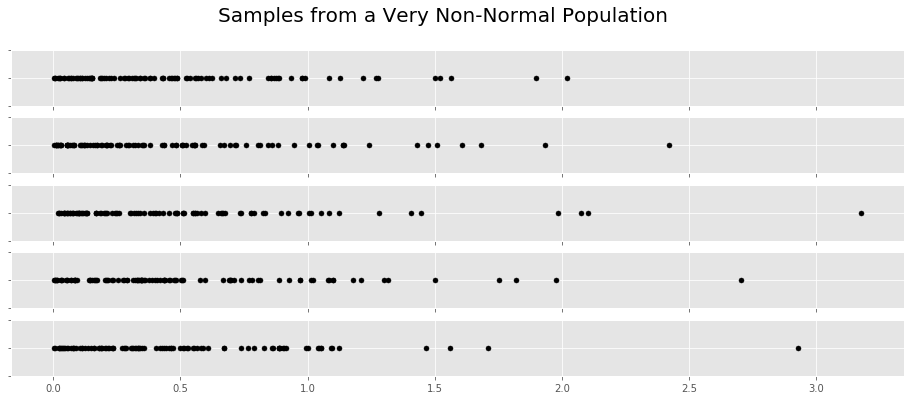

In [34]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(100)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Samples from a Very Non-Normal Population", fontsize=20)

Remember, the **sampling distribution of the mean** is the distribution of the means computed from these *different samples*.

Let's do that, let's repeatedly sample, compute the means of the samples, then plot the distribution of these means.

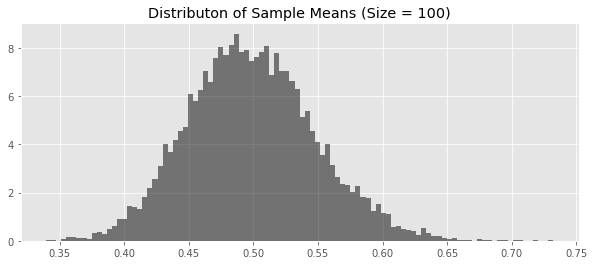

In [35]:
sample_means = [population.rvs(100).mean() for _ in range(10000)]

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(sample_means, bins=100, normed=True, color="black", alpha=0.5)
_ = ax.set_title("Distributon of Sample Means (Size = 100)")

That distribution looks quite familiar.

Let's overlay a normal distribution with the correct mean and variance.

In [36]:
np.var(sample_means)

0.0024417033355015657

In [37]:
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)
sample_means_model = scs.norm(mean_sample_means, 
                                np.sqrt(variance_sample_means))

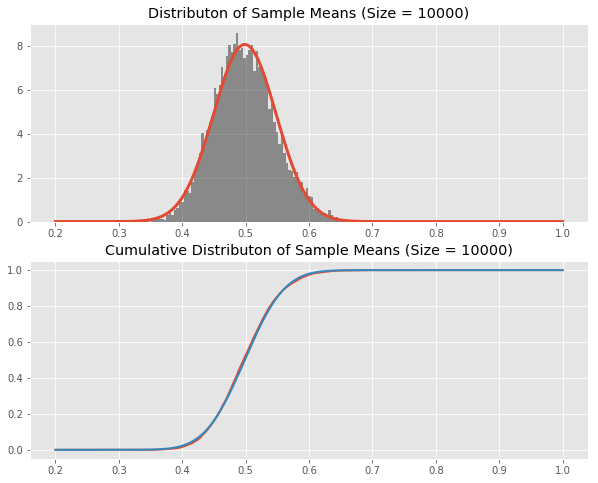

In [38]:
fig, ax = plt.subplots(2,1, figsize=(10, 8))

superimpose_pdf_of_fit_model(sample_means, 
                             sample_means_model, 
                             ax[0], 
                             bins=100,
                             x_lower=0.2, 
                             x_upper=1)
ax[0].set_title("Distributon of Sample Means (Size = 10000)")


superimpose_cdf_of_fit_model(sample_means, 
                             sample_means_model, 
                             ax[1], 
                             x_lower=0.2, 
                             x_upper=1)
ax[1].set_title("Cumulative Distributon of Sample Means (Size = 10000)");

Yah, that looks pretty close.

### The Central Limit Theorem

The **central limit theorem** asserts that as we take the mean of larger and larger samples, the distribution of sample means becomes more and more normal.

Said differently, probabilistic statements about the mean of a large sample can be well approximated by assuming that the distribution of the sample means is a normal distribution with the mean $\bar{x}$ and variance $\frac{s^2}{N}$

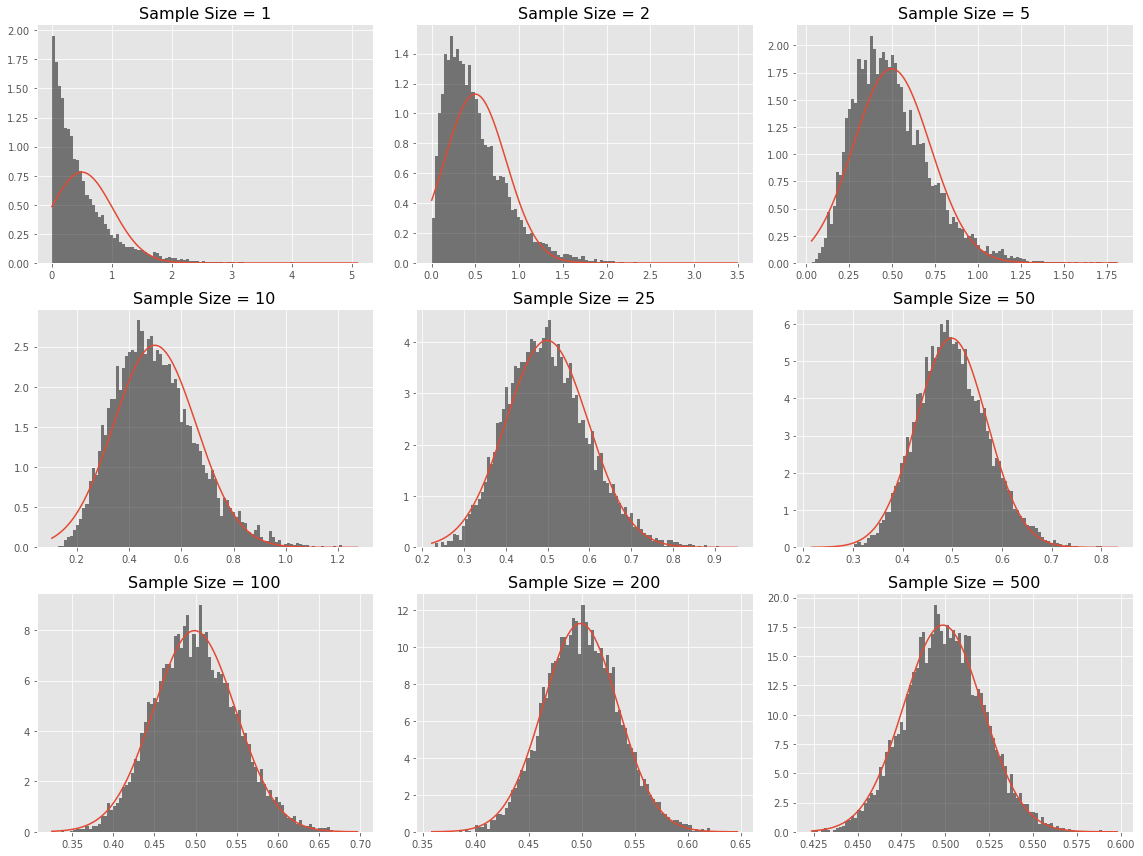

In [39]:
size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200, 500]

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = [population.rvs(sample_size).mean() for _ in range(10000)]
    variance_sample_means = np.var(sample_means)
    sample_means_model = scs.distributions.norm(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, normed=True, color="black", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t))
    _ = ax.set_title("Sample Size = {}".format(sample_size), fontsize=16)
fig.tight_layout()

### Statement of the Central Limit Theorem

Suppose $X_1, X_2, \ldots$ are i.i.d. copies of a random variable with finite expectation and variance

$$ E[X_1] = E[X_2] = \cdots = \mu $$
$$ Var(X_1) = Var(X_2) = \cdots = \sigma^2 $$

Then the distribution of sample means tends to a normal distribution with the appropriate mean and standard deviation:

$$ \frac{X_1 + X_2 + \cdots + X_k}{k} \rightarrow N \left( \mu, \frac{\sigma}{\sqrt{k}} \right) $$

as $k \rightarrow \infty$.

**Note:** The CLT also applies to a simple sum, though the mean and variance are different

$$ X_1 + X_2 + \cdots + X_k \rightarrow N \left( k \mu, \sqrt{k} \sigma \right) $$

The type of convergence is the CLT is called [convergence in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution).

A couple of notes

  - The stunning part of the central limit theorem is that it makes almost no assumptions about $X$.  $X$ can be anything, and its sample means will always tend toward normality.
  - The central limit theorem is a **miracle**, pure and simple.  There is no real *reason* it is true, it just is.  Consider it a gift of rare order in the universe, more like a fundamental law of physics than an intuitive mathematical fact.
  - Here's an elevator pitch statement of the central limit theorem, good for job interviews: **The central limit theorem allows us to make probabilistic statements about the sample mean from any population using the normal distribution.**

### Example: The Binomial Distribution

Consider a binomial distribution $Binom(n, p)$, which assigns probabilities to the number of heads shown in $n$ flips of a coin where the probability of seeing a head in a **single flip** is $p$.

Consider a variable $X$ which is distributed as binomial

$$ X \sim Binom(n, p) $$

and also a ton of variables representing **single coin flips**

$$ X_1, X_2, \ldots \sim Binom(1, p) $$

**Claim:** $X \sim X_1 + X_2 + \cdots + X_n$

**Question:** Why?

The central limit theorem has an immediate consequence:  Binomial distributions with large $n$ tend to be approximately normal!

$$ Binom(n, p) \sim N(np, \sqrt{n p (1 - p)} ) $$

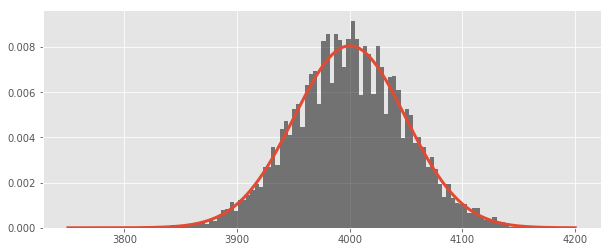

In [40]:
binomial = scs.binom(10000, 0.4)
binomial_sample = binomial.rvs(10000)

binomial_sample_mean = np.mean(binomial_sample)
binomial_sample_variance = np.var(binomial_sample)
normal_approx = scs.norm(binomial_sample_mean, np.sqrt(binomial_sample_variance))

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(binomial_sample, bins=100, normed=True, color="black", alpha=0.5)
x = np.linspace(3750, 4200, num=250)
ax.plot(x, normal_approx.pdf(x), linewidth=3);

An immediate consequence: Binomial probabilities with large $n$ can be well approximated using the normal distribution.

#### Important Note

The central limit theorem lets us make probabilistic statements about a very specific sample statistic: the sample mean.  Because of this, much emphasis is placed on the sample mean in many courses on statistics.

**The sample mean is not the only important statistic**, if you are trying to estimate hurricane losses, the mean loss is probably not as important as, say, the *maximum possible loss*.  The central limit theorem has **nothing** to say about this situation.

The central limit theorem is an important tool, but it is not **general**.  Other tools would be rightfully viewed as more important, i.e. bootstrapping.

### The Central Limit Theorem: The Point

When we are concerned with a **sample mean**, the central limit theorem lets us derive the **actual distribution of the sample mean**.  This allows us to calculate probabilities about the sample mean.

## Appendix: Confidence Intervals: Capturing Population Parameters

Recall our statement from earlier

> Our general interest is in the **population**, the **sample** is just the lens we get to view it through.

We have shown that **sample statistics are generally good approximations of properties of the population**, and we have also discovered **methods for approximating the distribution of sample statistics**  such as bootstrapping and the central limit theorem.

Together these allow us to address a final question

> How good of an approximation of a population parameter is a sample statistic?

### Example: CLT Based Confidence Interval for the Sample Mean

Consider our sample from a secret population, which we have used as a running example

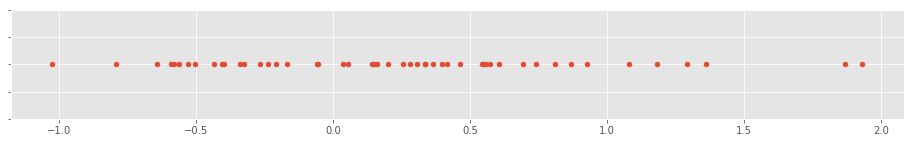

In [41]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)

Here are the facts we have accumulated about this situation

  - The sample mean is an approximation of the population mean: the expected value of the sample mean *is* the population mean.
  - The sample mean is approximately normally distributed, the mean and variance of this normal distribution can be computed in terms of the population mean and variance, and the size of the sample.
  
Let's denote by 
  - $\mu$ the population mean.
  - $\sigma^2$ the population variance.
  - $\bar x$ the **sample mean**.
  
Then we can summarize all this as

$$ \bar x \sim N \left( \mu, \frac{\sigma}{\sqrt{n}} \right) $$

If we subtract the population mean from both sides we get

$$ \bar x - \mu \sim N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $$

Which allows us to make probabilistic statements about how far the sample mean is from the population mean.

A **confidence interval** is the answer to a question like this

> How far do I have to go to the left and the right of the sample mean so that 95% of the time (i.e. in 95% of possible samples) I will have enclosed the population mean?

Let $\alpha$ denote the distance you move to the left and right of the sample mean when drawing your interval.  In notation, we are asking to find $\alpha$ such that

$$ P(\bar x - \alpha \leq \mu \leq \bar x + \alpha) = 0.95 $$

This is the same as asking for

$$ P( - \alpha \leq \mu - \bar x \leq \alpha ) = 0.95 $$

Which is, visually:

[]

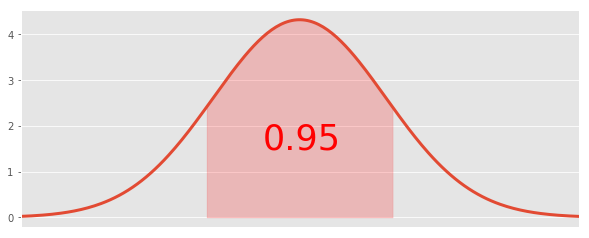

In [42]:
sample_mean = np.mean(data)
sample_variance = np.var(data)
distribution_of_sample_minus_population_mean = scs.norm(0, np.sqrt(sample_variance / len(data)))

fig, ax = plt.subplots(1, figsize=(10, 4))
x = np.linspace(-0.3, 0.3, num=250)
pdf = distribution_of_sample_minus_population_mean.pdf(x)
ax.plot(x, pdf, linewidth=3)

# Shade under curve
# Note: The 0.1 here is just for illistration, it does not correspond to
#       any particular value of alpha.
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.1 <= x) * (x <= 0.1) ), color="red", alpha=0.2)
ax.text(-0.04, 1.5, "0.95", fontsize=35, color="red")
ax.set_xticks([])

The shaded region is the area under the density between $-\alpha$ and $\alpha$. We want the **shaded region** to account for $0.95$ of the total area.

This means that each *half* of the shaded area to the *left and right* of zero should account for $0.475$ of the total area.

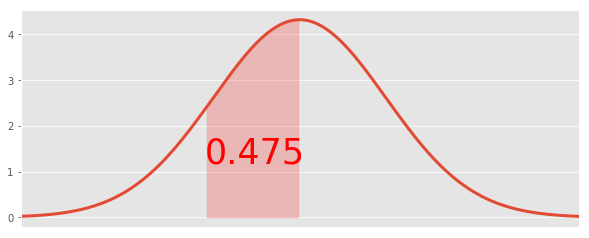

In [43]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.1 <= x) * (x <= 0.0) ), color="red", alpha=0.2)
ax.text(-0.102, 1.2, "0.475", fontsize=35, color="red")
ax.set_xticks([]);

Which means that the "tail" to the left of $\alpha$ should account for $0.5 - 0.475 = 0.025$ of the total area.

[]

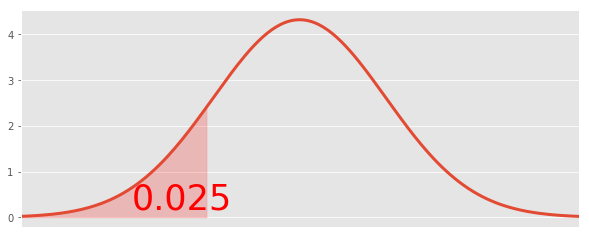

In [44]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.1) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.set_xticks([])

It is **this kind of area that is computed by the distribution function**.

So, if we denote by $F$ the **distribution function of** $ N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $, then we are after the value of $\alpha$ satisfying

$$ F(-\alpha) = 0.025 $$

Or $$F^{-1}(0.025) = -\alpha$$

The **inverse of the distribution function** is often called the **percentile function**.

[]

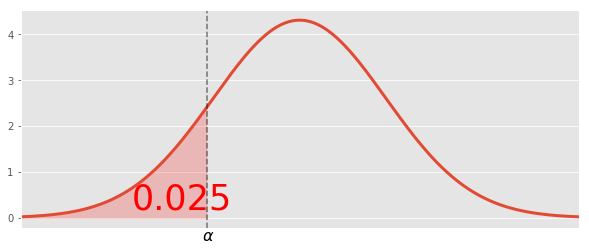

In [45]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.1) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.axvline(x=-0.1, ymin=0.0, ymax=100, color="black", 
           linestyle='--', alpha=0.5)
ax.text(-0.105, -0.5, r"$\alpha$", fontsize=16)
ax.set_xticks([])

In [46]:
alpha = distribution_of_sample_minus_population_mean.ppf(0.025)
print("Sample Mean: {:2.2}".format(sample_mean))
print("95% confidence interval for the population mean: [{:2.2}, {:2.2}]".format(
    sample_mean + alpha, sample_mean - alpha)
    )

Sample Mean: 0.23
95% confidence interval for the population mean: [0.045, 0.41]


Recall our interpretation here

> If we draw samples from the population and compute this confidence interval many, many times, then the computed interval should envelop the true population parameter approximately 95% of the time.

In this case, I wrote the code to create the population, so I know the correct answer

**The population mean is $0.1$.**

So let's run a simulation and see if everything worked.

In [47]:
def compute_confidence_interval(data, confidence_width):
    sample_mean = np.mean(data)
    sample_variance = np.var(data)
    distribution_of_sample_minus_population_mean = scs.norm(0, np.sqrt(sample_variance / len(data)))
    alpha = distribution_of_sample_minus_population_mean.ppf(0.5 - (confidence_width / 2.0))
    # Alpha is negative
    return sample_mean + alpha, sample_mean - alpha

In [48]:
population_mean_is_in_interval = []
for i in range(1000):
    new_data = scs.distributions.norm(0.1,0.7).rvs(50)
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    population_mean_is_in_interval.append(left_endpoint <= 0.1 <= right_endpoint)
    
print("Proportion of confidence intervals containing the true parameter: {:2.2f}".format(
        np.mean(population_mean_is_in_interval)))

Proportion of confidence intervals containing the true parameter: 0.94


Which is what we would expect.

To dive the point home, we can plot all of these confidence intervals along with the true parameter, and visually see which do and do not contain the parameter.

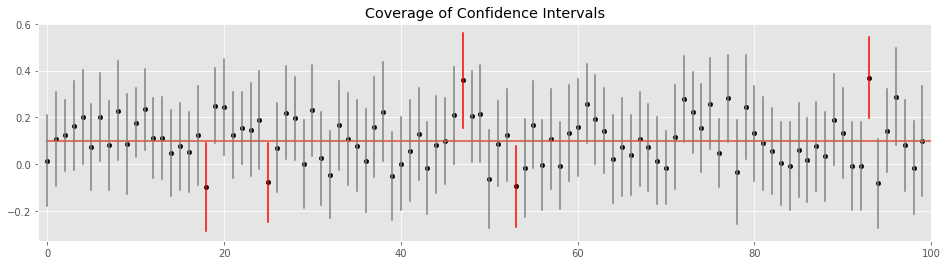

In [49]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot([0, 100], [0.1, 0.1])

for i in range(100):
    new_data = scs.distributions.norm(0.1,0.7).rvs(50)
    sample_mean = new_data.mean()
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    color = "grey" if (left_endpoint <= 0.1 <= right_endpoint) else "red"
    ax.plot([i, i], [left_endpoint, right_endpoint], color=color)
    ax.scatter([i], [sample_mean], c="black", s=20)
    ax.set_xlim(-1, 100)
    
ax.set_title("Coverage of Confidence Intervals");

### Example: Bootstrap Confidence Interval for 75'th Percentile

The above example relied on the central limit theorem to provide the sampling distribution of the statistic, which is only possible for very specific sample statistics.

Consider estimating a confidence interval of the 75'th percentile of a population.  In this case, the central limit theorem does not allow us to derive a mathematical form of the sampling distribution, instead we can proceed by using bootstrap sampling.

Here is the bootstrap procedure for computing a confidence interval for a 75'th percentile

  - Draw many bootstrap samples from your main sample, and for each:
    - Compute the sample statistic (using the bootstrap sample)
  - Gather together all the sample statistics of the various bootstrap samples into a list.
  
The resulting list can be considered as a sample from the sampling distribution of the statistic.

  - Compute the 95% confidence interval by finding the 0.025 and 0.975 percentiles of the resulting list of sample statistics.

In [50]:
bootstrap_sample_75_percentiles = []
for i in range(10000):
    bootstrap_indices = np.random.randint(low=0, high=len(data), size=len(data))
    bootstrap = data[bootstrap_indices]
    bootstrap_75_percentile = np.percentile(bootstrap, 75)
    bootstrap_sample_75_percentiles.append(bootstrap_75_percentile)

This code creates an approximation the the sampling distribution of the statistic.

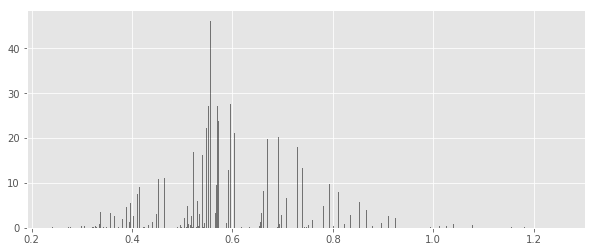

In [51]:
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(bootstrap_sample_75_percentiles, bins=500, normed=True, color="black", alpha=0.5)

We get a confidence interval by computing the 0.025 and 0.975 percentiles of the resulting sampling distribution approximation

In [52]:
left_endpoint = np.percentile(bootstrap_sample_75_percentiles, 2.5)
right_endpoint = np.percentile(bootstrap_sample_75_percentiles, 97.5)

print("Sample 75'th Percentile: {:2.2f}".format(np.percentile(data, 75)))
print("Bootstrap Confidence Interval for Population 75'th Percentile: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Sample 75'th Percentile: 0.57
Bootstrap Confidence Interval for Population 75'th Percentile: [0.36, 0.87]


**Question:** Why is this confidence interval not symmetric?